# Linear Regression

This time we are implementing linear regression. This will be a repition to apply all of the learned concepts. The typical `pytorch` pipeline costs of the following steps:

* Forward pass: Design model (input size, output size)
* Construct the loss and optimizer
* Training loop
    * Forward pass: compute prediction and loss
    * Backward pass: gradients
    * Update weights

First, let's import a couple of things we need.

In [2]:
import torch
import torch.nn as nn

#numpy for data transformations 
import numpy as np

#we want to dataset a regression dataset
from sklearn import datasets

#for plotting
import matplotlib.pyplot as plt

In the first step, we are going to do prepare out data.

In [8]:
#making a dataset for linear regression with 100 samples and one feature - right now this is a double data type
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)

#converting the regression dataset into a torch tensor - we want to convert X_numpy into a float data type
X = torch.from_numpy(X_numpy.astype(np.float32))

#creating the y
y = torch.from_numpy(y_numpy.astype(np.float32))
#now, we have to reshape our y because it currently only has 1 row and we want to make it a column vector 
#each value in 1 row with only 1 column
y = y.view(y.shape[0], 1)
#view is a build in pytorch method which will reshape the tensor

#defining the number of samples and features
n_samples = list(X.shape)[0]
n_features = list(X.shape)[1]

print(n_samples, n_features)

100 1


Now, we will move onto the first step, which is designing the model. In the linear regression case, this is just one layer, so we can use the built in linear model.

In [9]:
#defining the input and output size
input_size = n_features
output_size = 1 #we only want to have 1 value for each sample we want to put in

model = nn.Linear(in_features = input_size, out_features = output_size)

Now, we will do the second step, which is constructing the loss and optimizer.

In [11]:
#using the MSE as the loss
criterion = nn.MSELoss()

#defining the learning rate
learning_rate = 0.1

#setting up the optimizer - using stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

Now, we will do the training loop.

In [12]:
#defining the number of iterations
num_epochs = 100

#training loop
for epoch in range(num_epochs):
    
    #forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    #backward pass
    loss.backward() #backpropagation and calculating the gradients
    
    #update
    optimizer.step() 
    
    #we have to empty the gradient - this is because, whenever we call the backward operation, this will sum of the gradients 
    #into the .grad() attribute
    optimizer.zero_grad()
    
    #print some information
    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 574.7786
epoch: 20, loss = 340.7931
epoch: 30, loss = 332.8533
epoch: 40, loss = 332.5776
epoch: 50, loss = 332.5679
epoch: 60, loss = 332.5676
epoch: 70, loss = 332.5675
epoch: 80, loss = 332.5676
epoch: 90, loss = 332.5676
epoch: 100, loss = 332.5676


Now, we will plot the results.

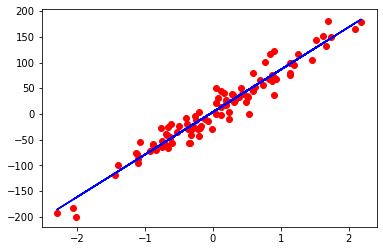

In [14]:
#defining the predicted - we want to make this into a numpy array
#to do this, we have to detach the tensor - this will not track the operation in the computational graph of pytorch
#right now, this tensor has the required_grads = True, but now we want this to be false
#this will generate a new tensor where the argument is False
predicted = model(X).detach().numpy()

#plotting our actual values as red dots
plt.plot(X_numpy, y_numpy, 'ro')

#plotting the approximated functions - the predicted values - this is the line of best fit 
plt.plot(X_numpy, predicted, 'b')

#displaying the plot
plt.show()

As we can see, this is a pretty good approximation of our data. 